In [1]:
import pandas as pd

In [2]:
from sklearn import cluster, datasets, metrics
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir+"/datascience_eda") 

In [4]:
import datascience_eda as eda

In [5]:
original_df = pd.read_csv(currentdir + "/data/menu.csv")
numeric_features = eda.get_numeric_columns(original_df)
drop_features = []
numeric_transformer = make_pipeline(SimpleImputer(), StandardScaler())
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features), ("drop", drop_features)
)
df = pd.DataFrame(
    data=preprocessor.fit_transform(original_df), columns=numeric_features
)

In [6]:
df.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,-0.284684,-0.055600,-0.082193,-0.083110,-0.189714,-0.186753,-0.475935,2.354245,2.362878,0.441471,...,-0.579695,-0.614883,1.514176,1.663125,-0.923090,0.321071,-0.140913,-0.324574,0.237056,0.834481
1,-0.493184,-0.447358,-0.434836,-0.449359,-0.566247,-0.562864,-0.475935,-0.343764,-0.357915,0.476198,...,-0.615159,-0.614883,1.514176,1.663125,-0.923090,0.408758,-0.305390,-0.324574,0.237056,0.030481
2,0.007217,0.571214,0.623093,0.603606,0.375084,0.452635,-0.475935,-0.114147,-0.116832,0.493562,...,-0.650622,-0.614883,1.514176,1.663125,-0.958025,0.058009,-0.223151,-0.324574,0.237056,0.260195
3,0.340818,0.962972,0.975736,0.969855,0.751616,0.828745,-0.475935,2.641267,2.638401,0.632471,...,-0.615159,-0.614883,1.514176,1.663125,-0.958025,0.671820,0.064684,-0.324574,0.531396,0.834481
4,0.132318,0.649565,0.623093,0.603606,0.375084,0.452635,-0.475935,-0.056742,-0.082392,0.667198,...,-0.615159,-0.614883,1.514176,1.663125,-0.958025,0.671820,-0.305390,-0.324574,0.237056,0.260195


***********************
EXPLORE CLUSTERING
***********************
------------------------
K-MEANS CLUSTERING
------------------------
Generating KElbow plot for KMeans.


/Users/administrator/opt/miniconda3/envs/563/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/administrator/opt/miniconda3/envs/563/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


<Figure size 576x396 with 0 Axes>

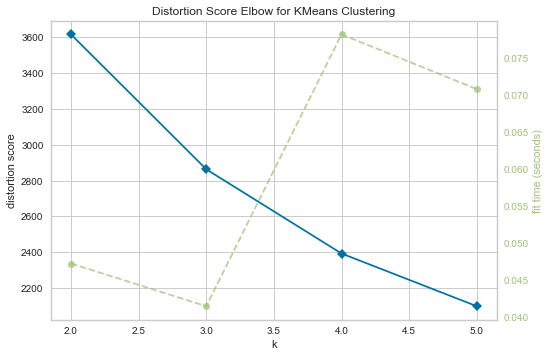

Generating Silhouette & PCA plots
Number of clusters: 2


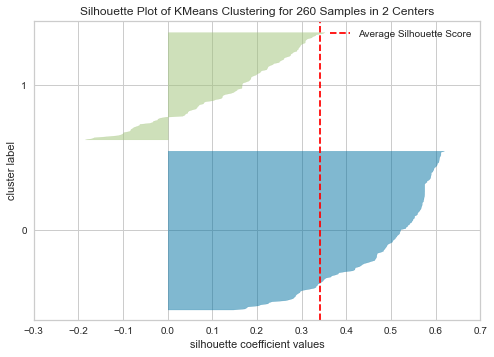

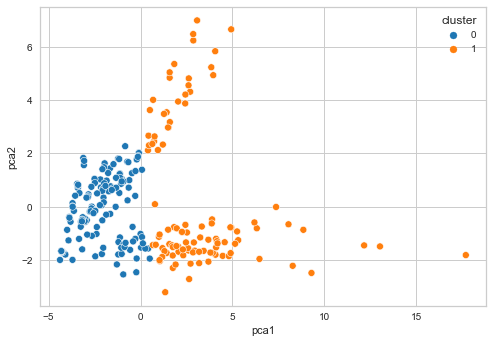

Number of clusters: 3


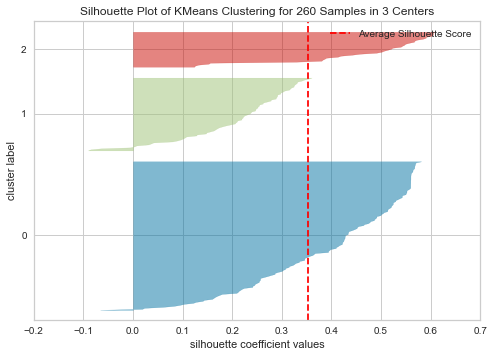

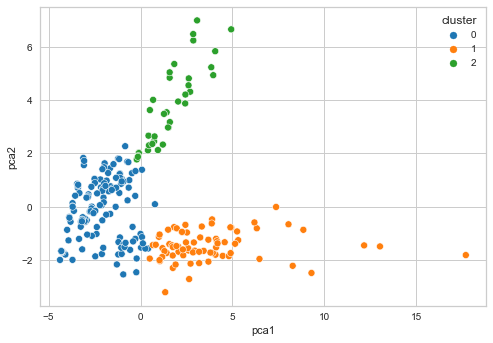

Number of clusters: 4


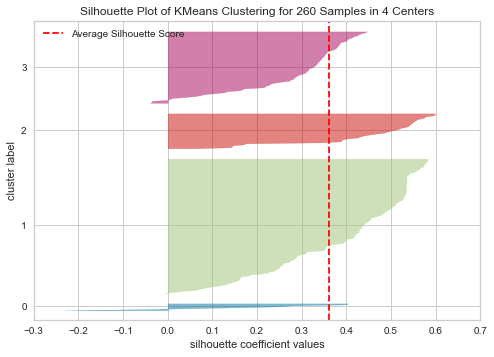

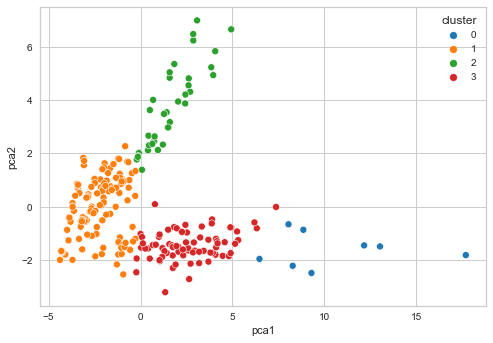

Number of clusters: 5


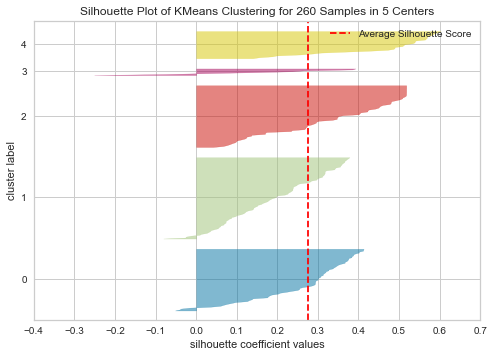

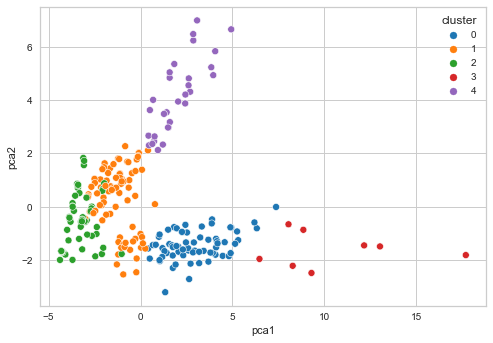

------------------------
DBSCAN CLUSTERING
------------------------
eps=0.5, min_samples=5, n_cluster=2


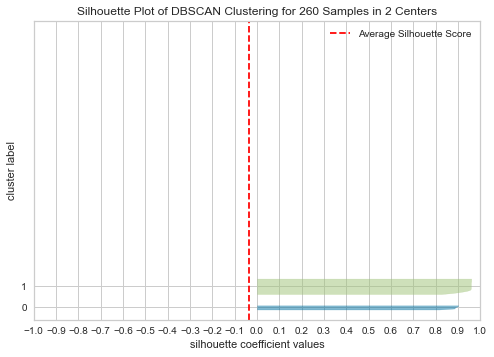

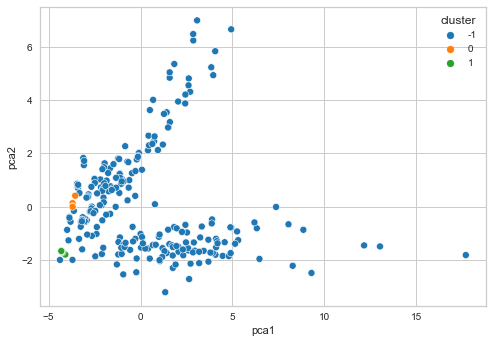

***********************
FINISHED CLUSTERING
***********************


In [7]:
results = eda.explore_clustering(df, random_state=2021);